# Downstream Exploitation of Space Data
## Python Crash Course Part 3: Data Visualization

### Learning Objectives

You will: 
* be able to create different plots with matplotlib
* be able to manipulate various plot elements
* be familiar with some of the good practices in plotting the data

### matplotlib

There are multiple Python libraries that you can utilize for plotting the data. The most commonly used one is called Matplotlib, you can see examples of plots here: https://matplotlib.org/stable/gallery/index.html

Documentation and extensive user guides can be found here: https://matplotlib.org/stable/users/index, of which much goes far beyond of what we need for this course. We will only cover how to make basic plots.

One great thing about matplotlib is that it has some additional libraries built on top of it, i.e. Seaborn, which is used to visualize statistical data. Examples of plots can be found here: https://seaborn.pydata.org/examples/index.html + you can see some examples in the exercise solution below.

As always, we begin by importing the libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # remember that we shorten the name of libraries for convenience

In [2]:
df = pd.read_csv('iris.csv') # loading our dataset
sep_len = df['sepal.length'] # selecting just one column for now

We can now make our first simple plot: 

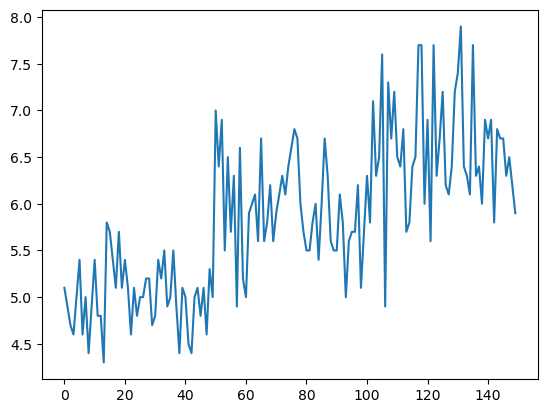

In [3]:
ax = sep_len.plot()

What we did here is we have plotted the value of sepal.length (y axis) and saved the plot in an ax variable.
We can make this plot a bit nicer:

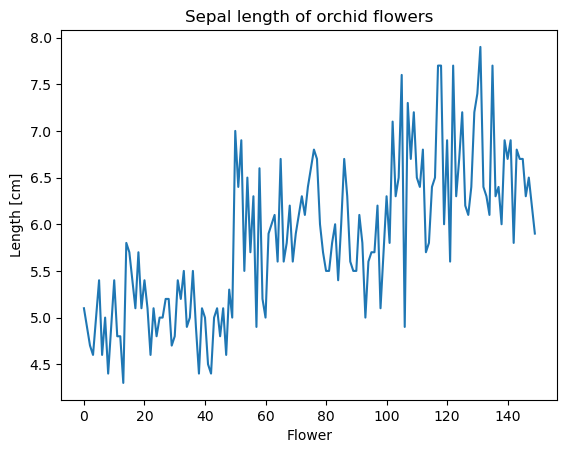

In [4]:
ax = sep_len.plot(
    title='Sepal length of orchid flowers', # title of our figure
    xlabel='Flower', # title of the x axis
    ylabel='Length [cm]', # title of the y axis
)

This would be the same as:

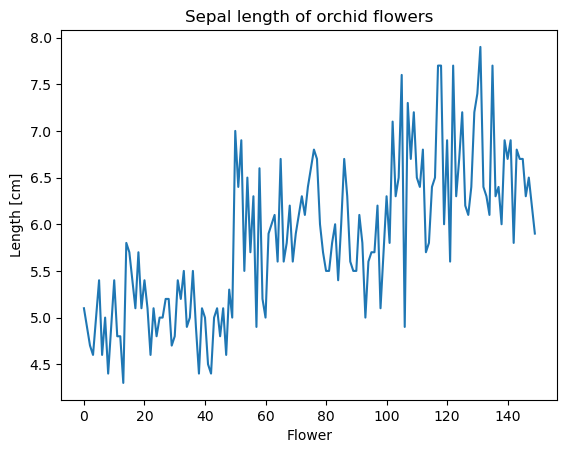

In [5]:
ax = df['sepal.length'].plot( # we specified the data here
    title='Sepal length of orchid flowers',
    xlabel='Flower',
    ylabel='Length [cm]',
)

We can do more things to our plot:

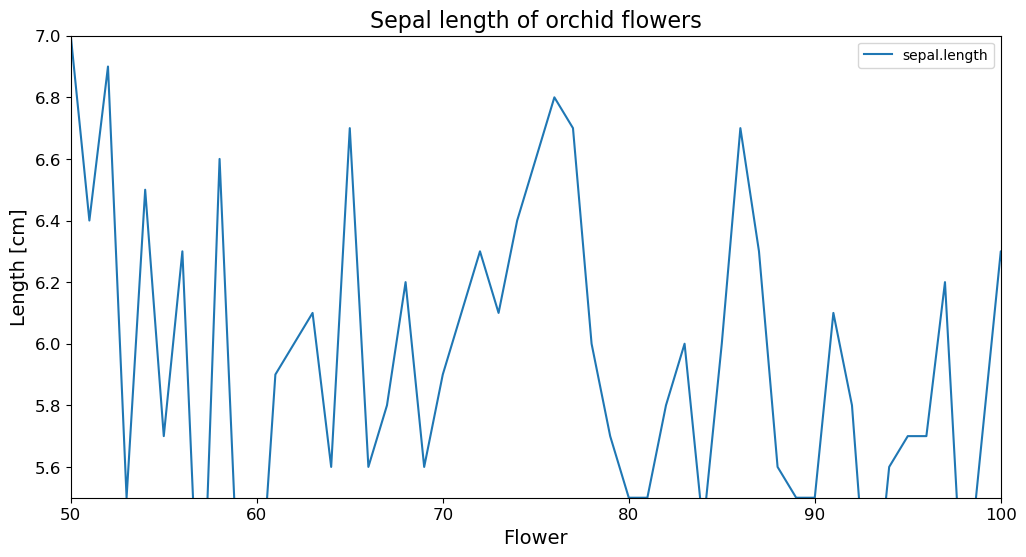

In [6]:
xmin, xmax = 50, 100 # limit for the x axis
ymin, ymax = 5.5, 7.0 # limit for the y axis

ax = df['sepal.length'].plot(
    title='Sepal length of orchid flowers',
    xlabel='Flower',
    ylabel='Length [cm]',
    xlim=[xmin, xmax], # limit for the x axis
    ylim=[ymin, ymax], # limit for the y axis
    figsize=(12, 6),
)
ax.title.set_fontsize(16)   # title font size
ax.xaxis.label.set_fontsize(14)  # x-axis label font size
ax.yaxis.label.set_fontsize(14)  # y-axis label font size
ax.tick_params(axis='both', which='major', labelsize=12) # tick labels font size
ax.legend()

Plots above were made with pandas interface with matplotlib under the hood, more often you would see plots made the way we will make them below:

### Different plots

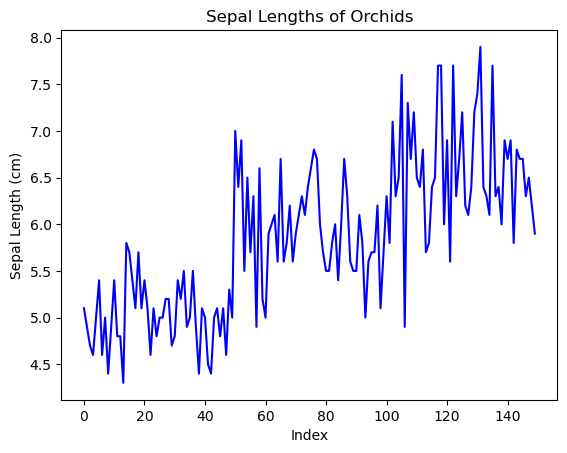

In [7]:
# simple line plot of sepal length
plt.plot(df['sepal.length'], color='blue')
plt.title('Sepal Lengths of Orchids')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.show()

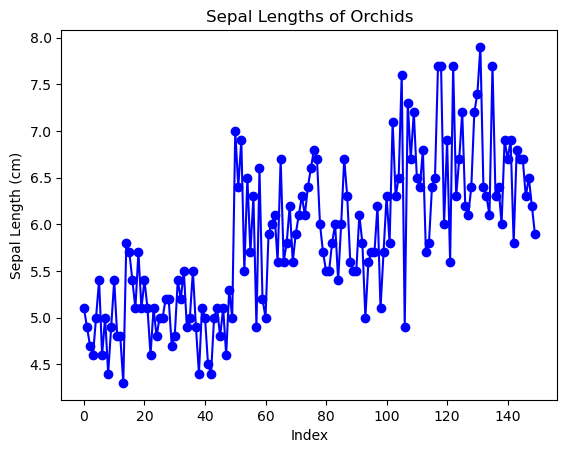

In [8]:
# simple line plot of sepal length with a marker
plt.plot(df['sepal.length'], color='blue', marker='o')
plt.title('Sepal Lengths of Orchids')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.show()

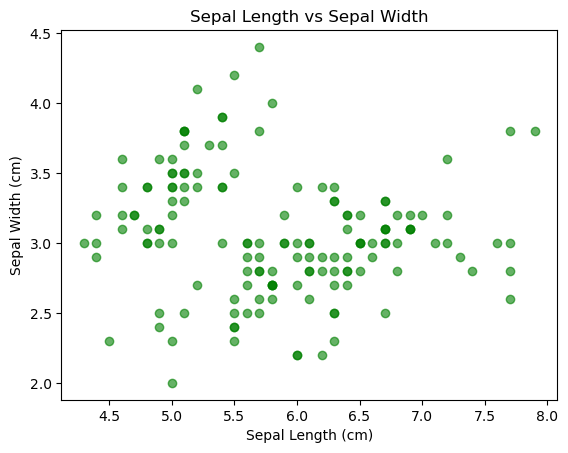

In [9]:
# scatter plot comparing sepal length and width
plt.scatter(df['sepal.length'], df['sepal.width'], color='green', alpha=0.6) # alpha controls how transparent the plot is
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

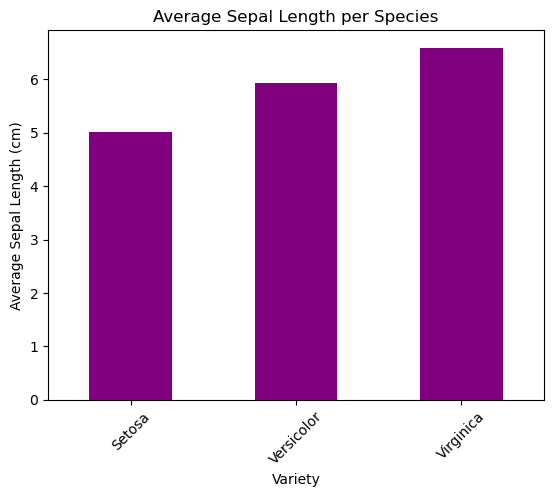

In [10]:
# bar plot of average sepal length per species
species_mean = df.groupby('variety')['sepal.length'].mean()
species_mean.plot(kind='bar', color='purple')
plt.title('Average Sepal Length per Species')
plt.xlabel('Variety')
plt.ylabel('Average Sepal Length (cm)')
plt.xticks(rotation=45) # rotates the ticks on the x axis
plt.show()

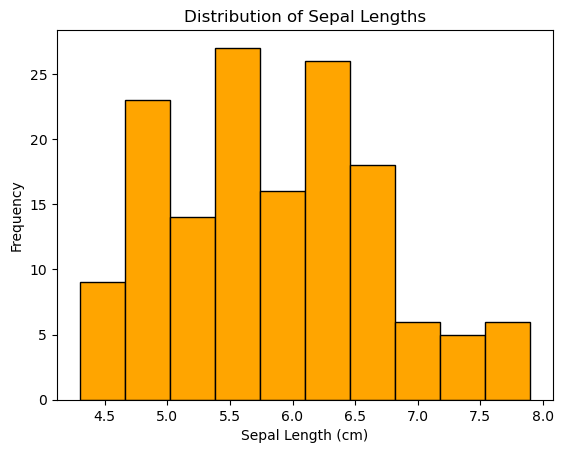

In [11]:
# histogram of sepal lengths
plt.hist(df['sepal.length'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Sepal Lengths')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

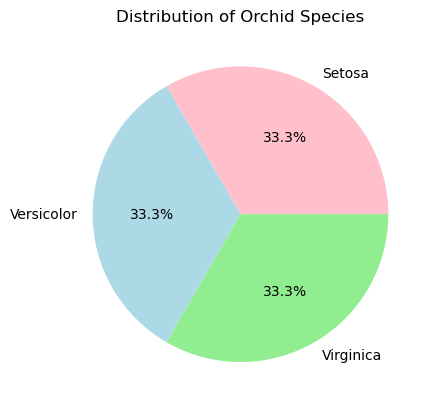

In [12]:
# count species and show pie chart
species_counts = df['variety'].value_counts()
species_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue', 'lightgreen'])
plt.title('Distribution of Orchid Species')
plt.ylabel('')  # hide the y-label
plt.show()

### Creating subplots

You will sometimes need to make figures with subplots. There are multiple ways to write code that does the same thing, we cover two structures here.

Let's start by creating a simple plot with two subplots, which has 1 row and 2 columns:

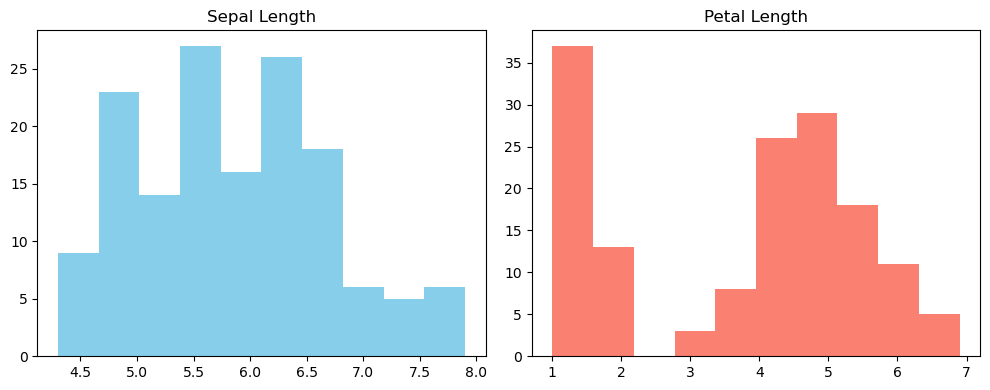

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) # the first argument is the number of rows, the second is the number of columns

# first suplot will have index 0
axs[0].hist(df['sepal.length'], color='skyblue', bins=10)
axs[0].set_title('Sepal Length')

# second subplot will have index 1
axs[1].hist(df['petal.length'], color='salmon', bins=10)
axs[1].set_title('Petal Length')

plt.tight_layout()
plt.show()

A slightly different way would be to do it like this:

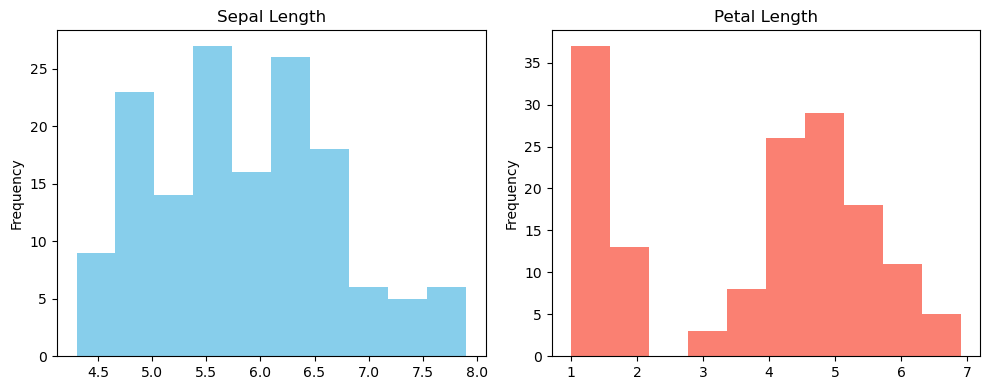

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # remains the same

# your data
sepal_length = df['sepal.length']
petal_length = df['petal.length']

# plots
sepal_length.plot(kind='hist', ax=axs[0], color='skyblue', bins=10, title='Sepal Length') # note the difference with a previous cell 
petal_length.plot(kind='hist', ax=axs[1], color='salmon', bins=10, title='Petal Length')

plt.tight_layout()
plt.show()

Which way did you find more readable? You can pick the one you like more when writing your code :)

Let's now try a plot with 4 subplots:

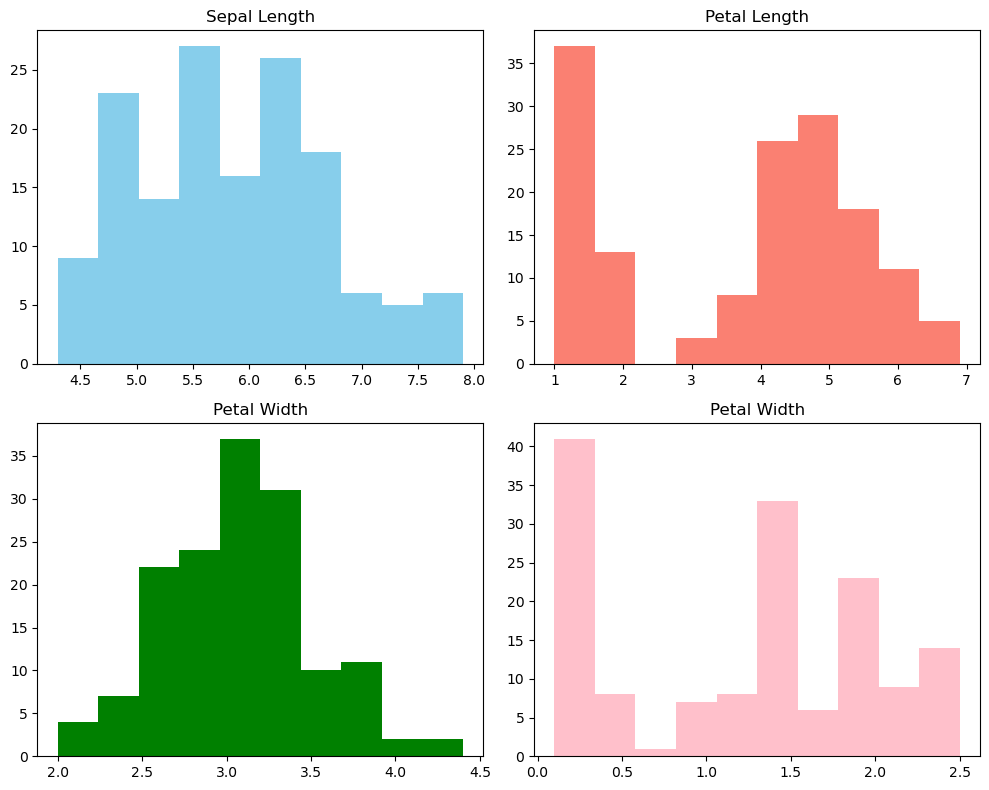

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # note that we now change the number of rows to 2

# first suplot will have index [0][0] -> row 0, column 0
axs[0][0].hist(df['sepal.length'], color='skyblue', bins=10)
axs[0][0].set_title('Sepal Length')

# second subplot will have index [0][1] -> row 0, column 1
axs[0][1].hist(df['petal.length'], color='salmon', bins=10)
axs[0][1].set_title('Petal Length')

# third subplot will have index [1][0] -> row 1, column 0
axs[1][0].hist(df['sepal.width'], color='green', bins=10)
axs[1][0].set_title('Petal Width')

# fourth subplot will have index [1][1] -> row 1, column 1
axs[1][1].hist(df['petal.width'], color='pink', bins=10)
axs[1][1].set_title('Petal Width')

plt.tight_layout()
plt.show()

Same as above, the second way would be: 

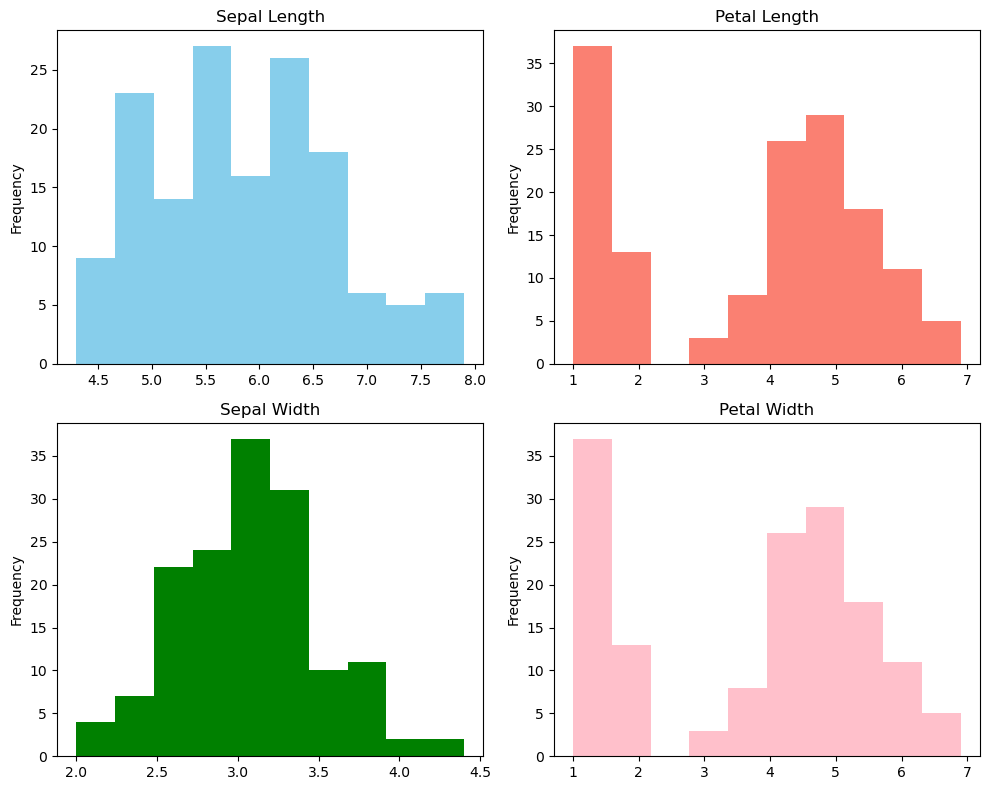

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # remains the same

# your data
sepal_length = df['sepal.length']
petal_length = df['petal.length']
sepal_width = df['sepal.width']
petal_width = df['petal.width']

# now that we have more axs values, we can make our life a bit easier by saving them in variables
ax00 = axs[0][0]
ax01 = axs[0][1]
ax10 = axs[1][0]
ax11 = axs[1][1]

# plots
sepal_length.plot(kind='hist', ax=ax00, color='skyblue', bins=10, title='Sepal Length')
petal_length.plot(kind='hist', ax=ax01, color='salmon', bins=10, title='Petal Length')
sepal_width.plot(kind='hist', ax=ax10, color='green', bins=10, title='Sepal Width')
petal_length.plot(kind='hist', ax=ax11, color='pink', bins=10, title='Petal Width')

plt.tight_layout()
plt.show()

### General plotting advice

matplotlib offers many opportunities for plot customization. Here are some must-haves when making plots:
* make sure that the font size for legend, labels, axis, and ticks is at least the size of the main text
* when putting a plot in the presentation, ask yourself if people on the last row will be able to read it
* make titles consise but informative
* use distinguishable colors for plotting. The worst color combinations are red+green and blue+yellow as those are difficult to distinguish for colorbling people. If you are using seaborn, there are colorblind-proof color combos

Can you tell which of those issues are present on the plots we made above? :) 

### Exercise

There is just one exercise and there is no one solution, be creative with your plot ;)

Load the toy_dataset.csv into a pandas dataframe and create a plot that has the following characteristics:
* has at least four subplots; each subplot has a title, y and x are labelled
* has at least two different types of plots
* one of the plots is a plot plotting data for Male and Female population in two different colors on the same plot; include a legend
* has a title
* colors are nice

### Solution

As said above, there is no concrete solution for it, both because you can make different plots and because you can customize them in different ways. Here is an example of a reasonably good plot:

In [17]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
df = pd.read_csv('toy_dataset.csv')

In [18]:
# setting a colorblind-friendly color palette
sns.set_palette('colorblind')

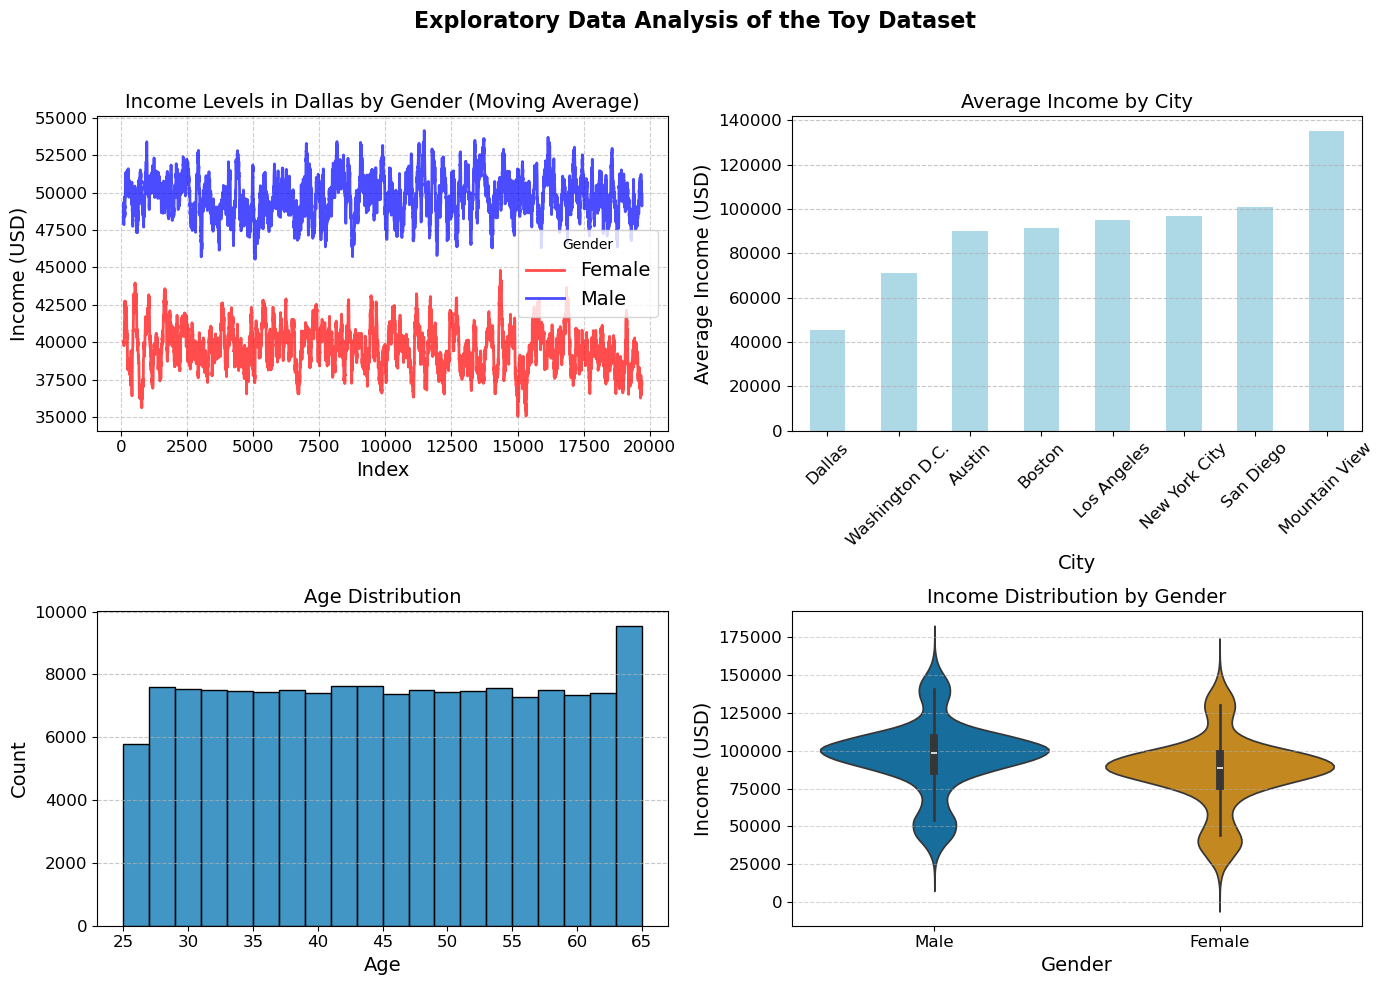

In [19]:
# creating a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis of the Toy Dataset', fontsize=16, weight='bold')

# plot00 - Line Plot: Income in Dallas by gender
dallas_data = df[df['City'] == 'Dallas']
rolling_window = 50  # adjusting for smoothness

color_map = {'Female': 'red', 'Male': 'blue'}

for gender, group in dallas_data.groupby('Gender'):
    group['Income_MA'] = group['Income'].rolling(window=rolling_window).mean()
    axs[0, 0].plot(group.index, group['Income_MA'], 
                   label=gender, 
                   color=color_map.get(gender, 'black'),
                   linewidth=2, 
                   alpha=0.7)

axs[0, 0].set_title('Income Levels in Dallas by Gender (Moving Average)', fontsize=14)
axs[0, 0].set_xlabel('Index', fontsize=14)
axs[0, 0].set_ylabel('Income (USD)', fontsize=14)
axs[0, 0].legend(title='Gender', fontsize=14)
axs[0, 0].tick_params(axis='both', which='major', labelsize=12)
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# plot01 - Bar Plot: average Income by City
city_income = df.groupby('City')['Income'].mean().sort_values()
city_income.plot(kind='bar', ax=axs[0, 1], color='lightblue')

axs[0, 1].set_title('Average Income by City', fontsize=14)
axs[0, 1].set_xlabel('City', fontsize=14)
axs[0, 1].set_ylabel('Average Income (USD)', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45, labelsize=12)
axs[0, 1].tick_params(axis='y', labelsize=12)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# plot 10 - Histogram: Age distribution
sns.histplot(df['Age'], bins=20, ax=axs[1, 0])

axs[1, 0].set_title('Age Distribution', fontsize=14)
axs[1, 0].set_xlabel('Age', fontsize=14)
axs[1, 0].set_ylabel('Count', fontsize=14)
axs[1, 0].tick_params(axis='both', which='major', labelsize=12)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# plot 11 - Violin Plot: Income by Gender
sns.violinplot(x='Gender', y='Income', data=df, ax=axs[1, 1], hue='Gender', legend=False)

axs[1, 1].set_title('Income Distribution by Gender', fontsize=14)
axs[1, 1].set_xlabel('Gender', fontsize=14)
axs[1, 1].set_ylabel('Income (USD)', fontsize=14)
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave some space for the main title
# plt.savefig('toy_dataset_analysis.pdf', format='pdf', bbox_inches='tight')
plt.show()

How would you further improve it?

If you want to save your plot (good practice is to do that in .pdf), uncomment the second to last line of the code.